## ZiP Tutorial

---

ZOGY is an image subtraction algorithm. It has been condensed down into a single function, so you only need to write a few lines of code to use it.

---

In [1]:
from ZOGYP import run_ZOGY
sci_im = 'test/2.fits'
ref_im = 'test/1.fits'


run_ZOGY(sci_im, ref_im)

Serial version


This is the most basic version of ZOGY. It assumes your images are pre-alligned and that the PSF is static across the field. The process creates 3 images:

* D image - A raw subtraction. (Science image - Refernece imaage)
* S image - PSF convolved, normalised D image
* Scorr image - A statistical map in image space, where 'bright sources' are more probable residuals

These three fits files are placed in a folder called output.

---

## Extracting sources
---
ZOGY has been parallelized, hence ZiP (ZOGY in Parallel). This is to make for a fast subtraction process. The purpose for having a speedy subtraction is to allow for real time transient/variable location. There are lots of ways to do this, the simplest is to use a basic source extractor (SExtractor) run on the Scorr image. 

---

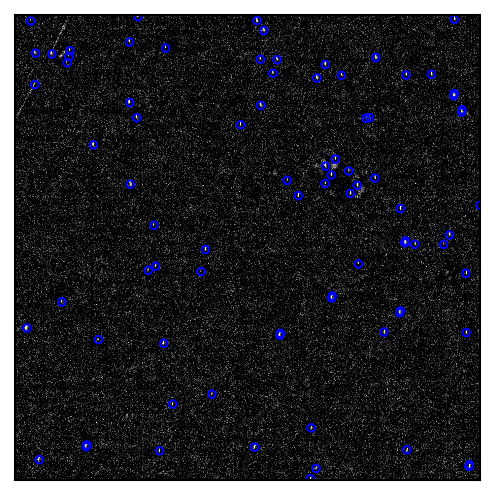

In [13]:
import subprocess
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

Scorr = './output/data_Scorr1.fits'
Scorr_dat = (fits.getdata(Scorr))/np.amax(fits.getdata(Scorr))
subprocess.call(['sex', Scorr, '-c', './configfls/check.sex','-CATALOG_NAME',  'Scorr.cat'])
tl = open('reg.cat', 'w')
K = open('Scorr.cat', 'r')

ax1 = plt.subplot2grid((1, 1), (0, 0))
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.035)
for lines in K:
 SL = lines.split()
 x = SL[1]
 y = SL[2]
 tl.write('circle '+x+' '+y+' 5 \n')
 circ = plt.Circle((float(x), float(y)), 15, color='b', fill=False)
 ax1.add_artist(circ)


plt.setp(ax1 ,xticks=[], yticks=[])
plt.rcParams['figure.dpi'] = 100
plt.show()
#subprocess.call(['ds9', './output/data_Scorr1.fits', '-regions', 'reg.cat'])
#subprocess.call(['rm', 'reg.cat'])

Above: The Scorr image with circles over extracted sources.

This is not an optimised method as a lot of faint sources are ignored and false positives are common. 

---


## More complex examples

---

Given a big enough field the PSF can vary, or the image can use up too much memory. To overcome this, the image is chopped up. This can be done using the sub_imagex, sub_imagey parameters. (Full parameter list can be found [here](https://github.com/GOTO-OBS/ZiP/blob/master/tutorial/readme.md)) 

---

In [20]:
from ZOGYP import run_ZOGY
run_ZOGY('t/test2_epoch_1.fits', 't/test2_ref.fits', sub_imagex = 2, sub_imagey = 2)

Serial version


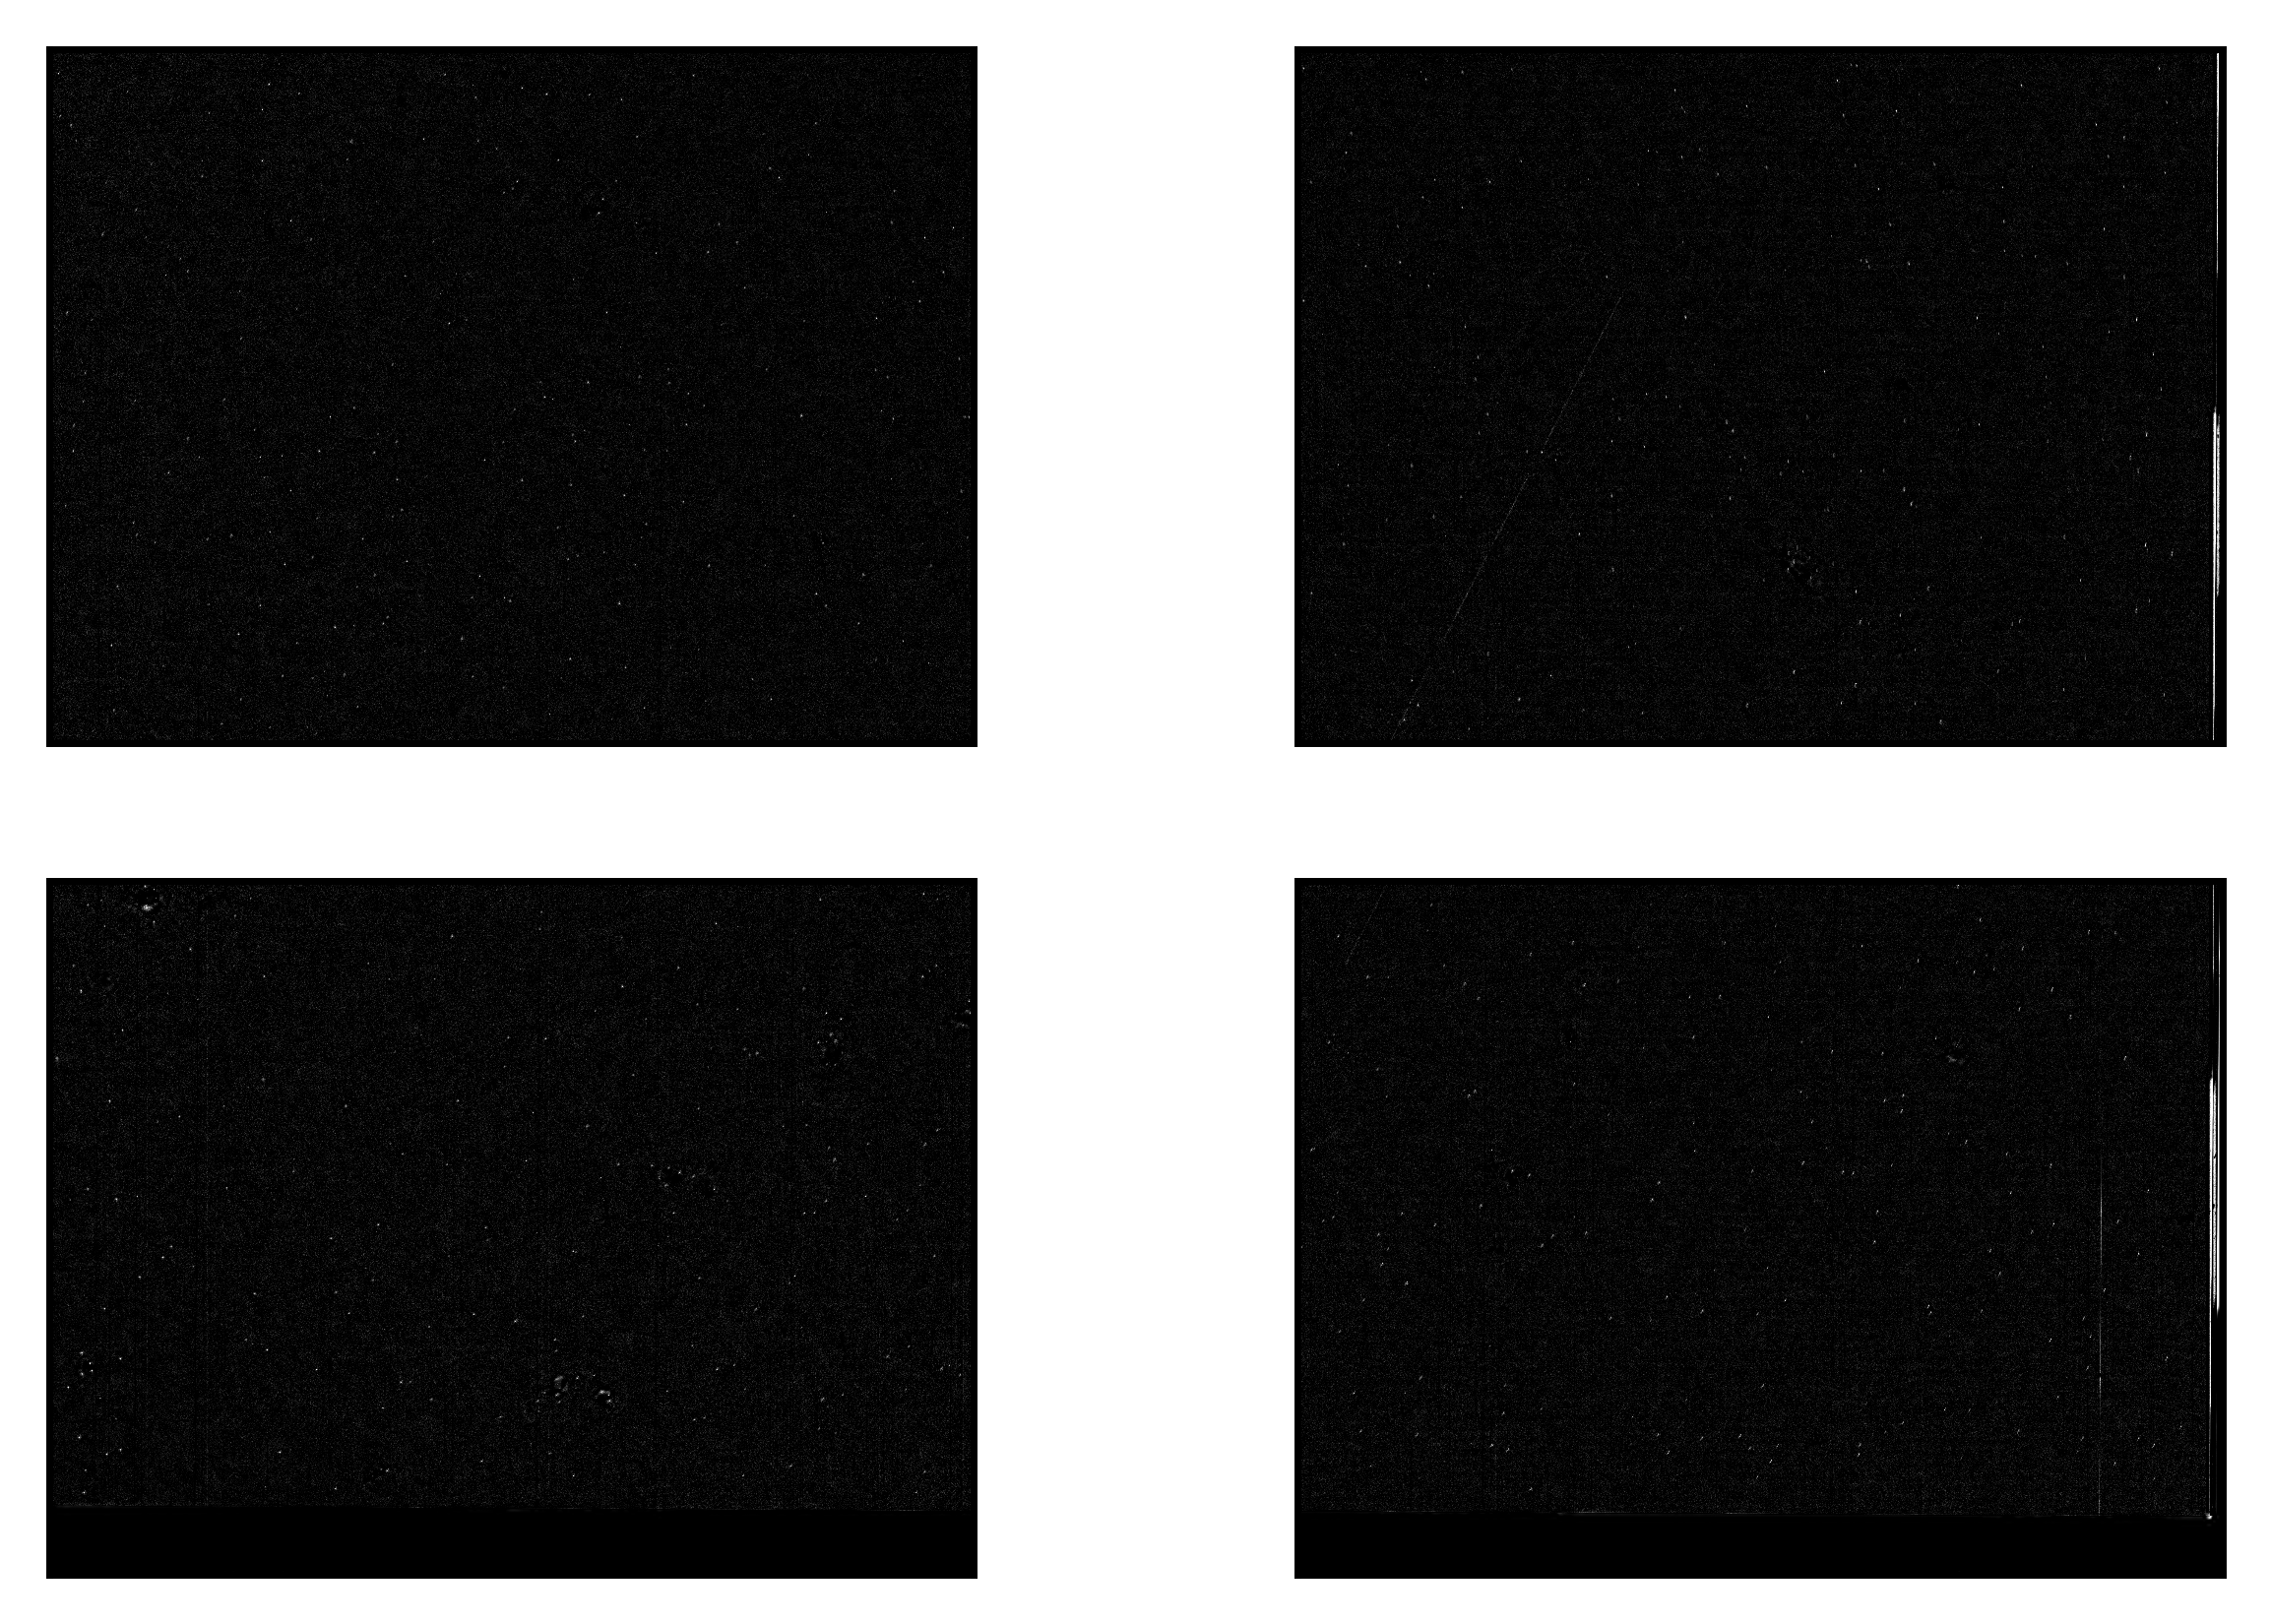

In [31]:
from astropy.io import fits
import matplotlib.pyplot as plt


ax1 = plt.subplot2grid((2, 2), (0, 0))
Scorr_dat = fits.getdata('output/data_Scorr1.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax1 ,xticks=[], yticks=[])

ax2 = plt.subplot2grid((2, 2), (1, 0))
Scorr_dat = fits.getdata('output/data_Scorr2.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax2 ,xticks=[], yticks=[])

ax3 = plt.subplot2grid((2, 2), (0, 1))
Scorr_dat = fits.getdata('output/data_Scorr3.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax3 ,xticks=[], yticks=[])

ax4 = plt.subplot2grid((2, 2), (1, 1))
Scorr_dat = fits.getdata('output/data_Scorr4.fits')       
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax4 ,xticks=[], yticks=[])

plt.rcParams['figure.dpi'] = 500
plt.show()

In this example, the original images are split into four sub images before doing the subtraction process.